In [1]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
#We load the .csv and visualize the first ten rows of it, we can also see the columns name
df = pd.read_csv('winequality-white.csv', sep=';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [3]:
#Now let's check the dataset shape so we can see the number of rows and columns
df.shape

(4898, 12)

In [4]:
#Replace spaces with _ for each column
df.columns = df.columns.str.replace(' ', '_')

In [5]:
#We check there are no missing values and no object data types
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

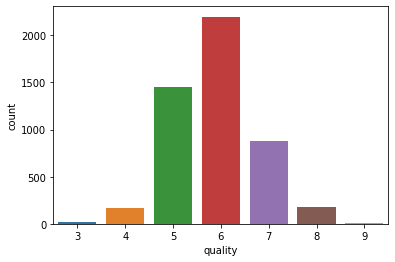

In [6]:
#let's start visualizing the different quality values and how many wines have that rating in our dataset
sns.countplot(df['quality'])
df['quality'].value_counts()

In [7]:
#Calculate and order correlations
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free_sulfur_dioxide     0.008158
citric_acid            -0.009209
residual_sugar         -0.097577
fixed_acidity          -0.113663
total_sulfur_dioxide   -0.174737
volatile_acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


<AxesSubplot:>

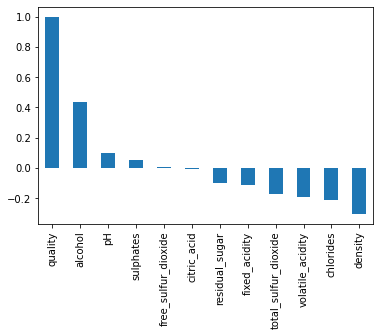

In [8]:
correlations.plot(kind='bar')

<AxesSubplot:>

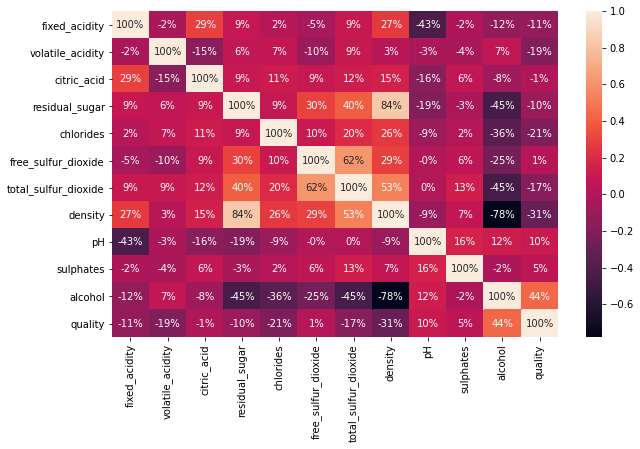

In [9]:
#Heatmap to plot all correlations between features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [10]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
pH                      False
sulphates               False
free_sulfur_dioxide     False
citric_acid             False
residual_sugar          False
fixed_acidity           False
total_sulfur_dioxide    False
volatile_acidity        False
chlorides                True
density                  True
Name: quality, dtype: bool


#### Alcohol Percent

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

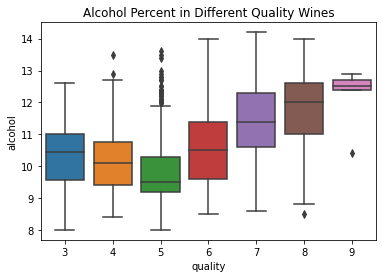

In [11]:
bp = sns.boxplot(x='quality',y='alcohol', data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

In [12]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

6    2198
5    1457
Name: quality, dtype: int64

In [13]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.339987
pH                      0.065685
sulphates               0.040497
citric_acid             0.001423
free_sulfur_dioxide    -0.022859
fixed_acidity          -0.056204
residual_sugar         -0.083344
chlorides              -0.133260
total_sulfur_dioxide   -0.157961
volatile_acidity       -0.213074
density                -0.218774
Name: quality, dtype: float64


#### Chlorides Percent

[Text(0.5, 1.0, 'Chlorides in Different Quality Wines')]

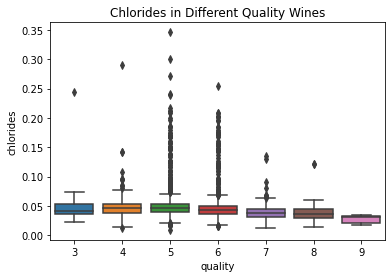

In [14]:
bp = sns.boxplot(x='quality',y='chlorides', data=df)
bp.set(title="Chlorides in Different Quality Wines")

#### Density Percent

[Text(0.5, 1.0, 'Density in Different Quality Wines')]

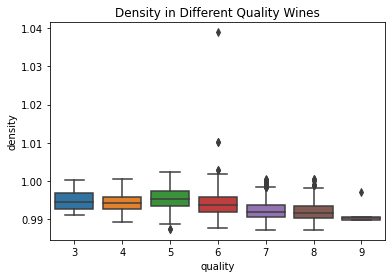

In [15]:
bp = sns.boxplot(x='quality',y='density', data=df)
bp.set(title="Density in Different Quality Wines")

In [16]:
#We make a copy of our dataframe and group quality in differnt groups
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8,9],['high','high','high'],inplace=True)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

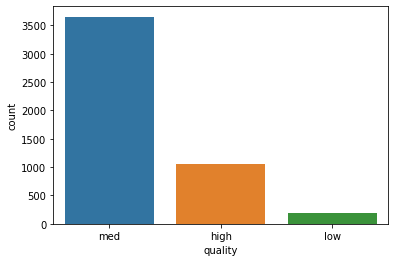

In [17]:
sns.countplot(df_aux['quality'])

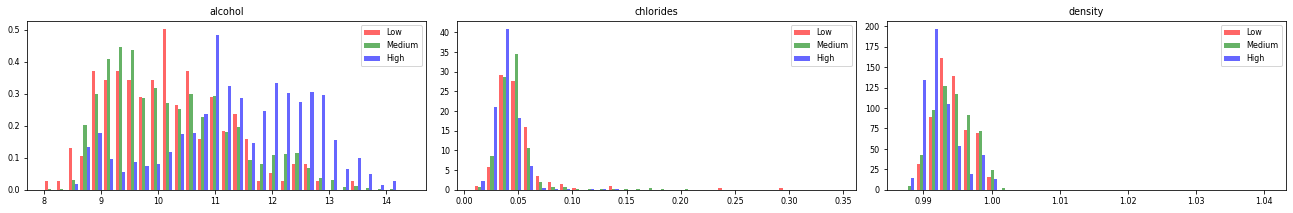

In [18]:
#We pot some histograms that show the values of features selected
flistt = ['alcohol','chlorides','density']
low = df_aux[df_aux['quality'] == 'low']
medium = df_aux[df_aux['quality'] == 'med']
high = df_aux[df_aux['quality'] == 'high']
plt.rcParams.update({'font.size': 8})
plot, graphs = plt.subplots(nrows= 1, ncols= 3, figsize=(18,3))
graphs = graphs.flatten()
for i, graph in enumerate(graphs):
    graph.figure
    binwidth= (max(df_aux[flistt[i]]) - min(df_aux[flistt[i]]))/30
    bins = np.arange(min(df[flistt[i]]), max(df_aux[flistt[i]]) + binwidth, binwidth)
    graph.hist([low[flistt[i]],medium[flistt[i]],high[flistt[i]]], bins=bins, alpha=0.6, density=True, label=['Low','Medium','High'], color=['red','green','blue'])
    graph.legend(loc='upper right')
    graph.set_title(flistt[i])
plt.tight_layout()

In [19]:
correlations[abs(correlations) > 0.2]

quality      1.000000
alcohol      0.435575
chlorides   -0.209934
density     -0.307123
Name: quality, dtype: float64

In [20]:
#We separe our features from our target feature (quality) and we split data intro training and test
X = df.loc[:,['alcohol','chlorides','density']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
#Fit the model and make prediction
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

In [23]:
# Find R^2
print('The R-square value of model is:', regressor.score(X, Y))

The R-square value of model is: 0.19511615781698521


In [24]:
# Find the MSE
mse = mean_squared_error(Y, regressor.predict(X))
print('The mean square error of FEV and predicted value is: ', mse)

The mean square error of FEV and predicted value is:  0.6311863253105093


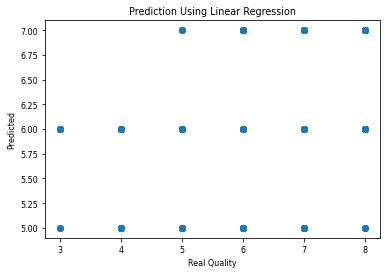

In [25]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

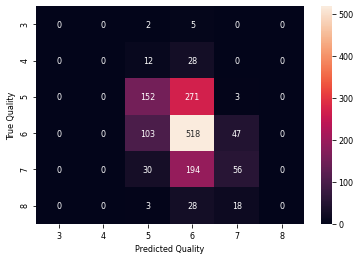

In [26]:
#Confussion Matrix for the Linear Regression Model
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


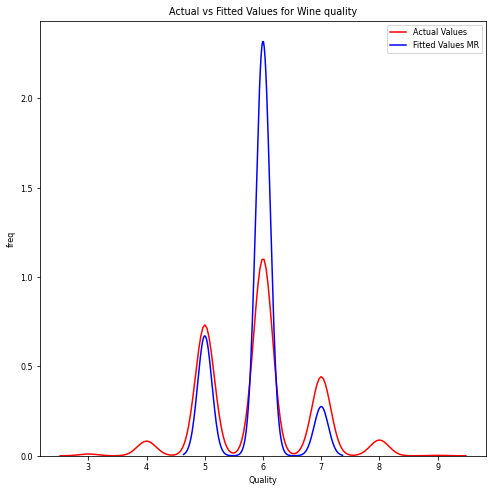

In [29]:
# Distribution plot
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(Y, hist=False, color='r', label='Actual Values')
sns.distplot(y_prediction_lr, hist=False, color='b', label='Fitted Values MR', ax=ax1)

plt.title('Actual vs Fitted Values for Wine quality')
plt.xlabel('Quality')
plt.ylabel('freq')
plt.legend()
plt.show()
plt.close()

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [38]:
rus = RandomUnderSampler()
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [40]:
#Fit the model and make prediction
regressor_s = LinearRegression()
regressor_s.fit(X_train_resampled, y_train_resampled)
y_prediction_lr_s = regressor_s.predict(X_test)
y_prediction_lr_s = np.round(y_prediction_lr_s)

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

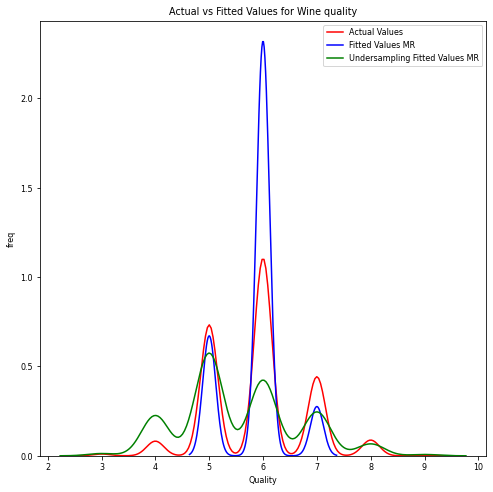

In [41]:
# Distribution plot
plt.figure(figsize=(8, 8))
ax1 = sns.distplot(Y, hist=False, color='r', label='Actual Values')
sns.distplot(y_prediction_lr, hist=False, color='b', label='Fitted Values MR', ax=ax1)
sns.distplot(y_prediction_lr_s, hist=False, color='g', label='Undersampling Fitted Values MR', ax=ax1)

plt.title('Actual vs Fitted Values for Wine quality')
plt.xlabel('Quality')
plt.ylabel('freq')
plt.legend()
plt.show()
plt.close()